# 회귀_종합실습1_carseat

## 1.환경준비

### (1) 라이브러리 로딩

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프 함수 만들기

In [53]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [54]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Income 	|	가구당 평균 소득액(1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Education 	|	 교육수준(범주 : 10~18)	|	feature	|
|	Urban 	|	 매장이 도심에 있는지 여부(범주 : Yes, No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	|


## 2.데이터 준비

### (1) 데이터 준비

In [55]:
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (2) 가변수화

In [56]:
cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

### (3) 데이터분할

In [57]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (4) Scaling

In [58]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

* 히든레이어를 추가한 모델 두 개 이상을 생성한 후
* 성능을 비교하시오.
* 성능을 높이기 위해서 조절할 것들
    * 히든레이어 수
    * 히든레이어 노드수
    * epochs 수
    * learning_rate : 0.1 ~ 0.0001 사이에서 조정(예 Adam(learning_rate = 0.01))


### (1) 모델1

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [59]:
nfeatures = x_train.shape[1]
nfeatures

18

In [60]:
clear_session()

model1 = Sequential([Dense(12,input_shape=(nfeatures,),activation='relu'),
                    Dense(6,activation='relu'),
                    Dense(1)])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                228       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 313 (1.22 KB)
Trainable params: 313 (1.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [61]:
model1.compile(optimizer=Adam(learning_rate=0.01),loss='mse')
history = model1.fit(x_train,y_train,epochs=50,validation_split=0.2).history

Epoch 1/50
8/8 [==============================] - 1s 29ms/step - loss: 65.5877 - val_loss: 54.2495
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 50.2873 - val_loss: 39.4618
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 31.8120 - val_loss: 20.1181
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 11.6915 - val_loss: 10.9187
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 10.5140 - val_loss: 14.1391
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 8.6770 - val_loss: 9.6849
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 7.3174 - val_loss: 9.1975
Epoch 8/50
8/8 [==============================] - 0s 10ms/step - loss: 6.8190 - val_loss: 8.8363
Epoch 9/50
8/8 [==============================] - 0s 9ms/step - loss: 6.1909 - val_loss: 8.9477
Epoch 10/50
8/8 [==============================] - 0s 11ms/step - loss: 5.9089 - val_loss: 8.4873
Epoch 11/50
8/8 [=====

* 학습곡선

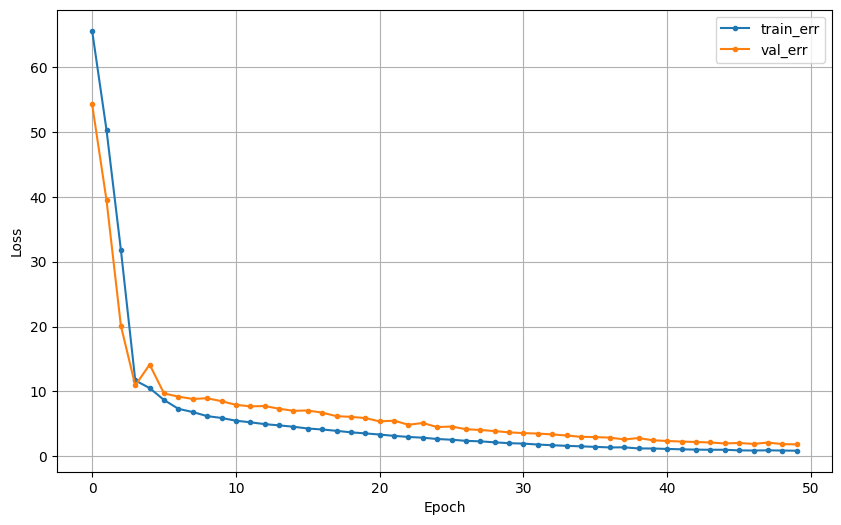

In [62]:
dl_history_plot(history)

* 검증

In [63]:
pred1 = model1.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred1, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred1)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred1)}') #y에 0이 있으면 값 측정이 어렵다
print(f'r2_score  : {r2_score(y_val, pred1)}')

3/3 [==============================] - 0s 4ms/step
RMSE : 1.4348748709896615
MAE  : 1.1493283607959746
MAPE : 239850730658201.84
r2_score  : 0.7694092583480366


### (2) 모델2

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [64]:
clear_session()

model2 = Sequential([Dense(30,input_shape=(nfeatures,),activation='relu'),
                     Dense(40,activation='relu'),
                     Dense(4,activation='relu'),
                     Dense(1)])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                570       
                                                                 
 dense_1 (Dense)             (None, 40)                1240      
                                                                 
 dense_2 (Dense)             (None, 4)                 164       
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1979 (7.73 KB)
Trainable params: 1979 (7.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [65]:
model2.compile(optimizer=Adam(learning_rate=0.1),loss='mse')
history2 = model2.fit(x_train,y_train,epochs=50,validation_split=0.2).history

Epoch 1/50
8/8 [==============================] - 2s 23ms/step - loss: 46.3724 - val_loss: 45.8247
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 37.9851 - val_loss: 14.4311
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 10.6229 - val_loss: 6.9844
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 7.9958 - val_loss: 7.6883
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 7.0022 - val_loss: 7.6121
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 5.6090 - val_loss: 6.1719
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 4.5963 - val_loss: 7.5670
Epoch 8/50
8/8 [==============================] - 0s 6ms/step - loss: 4.8125 - val_loss: 5.5773
Epoch 9/50
8/8 [==============================] - 0s 6ms/step - loss: 4.2477 - val_loss: 5.8538
Epoch 10/50
8/8 [==============================] - 0s 6ms/step - loss: 3.8315 - val_loss: 5.1782
Epoch 11/50
8/8 [================

* 학습곡선

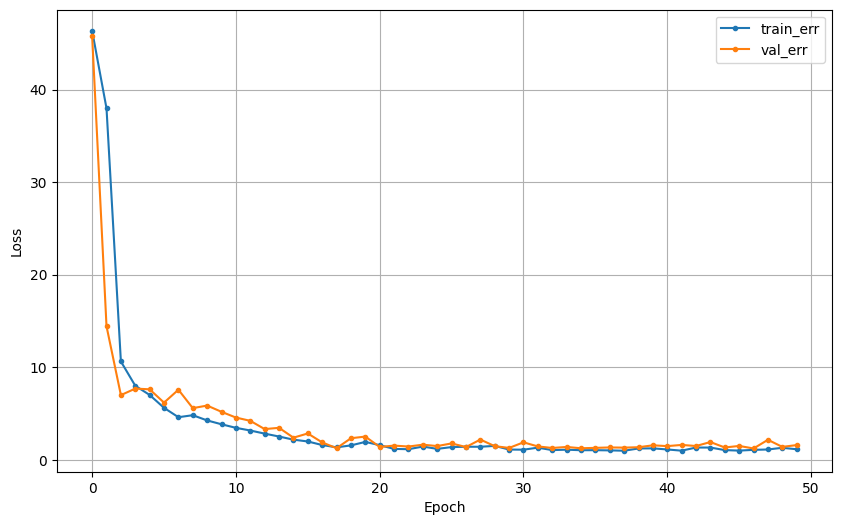

In [66]:
dl_history_plot(history2)

* 검증

In [67]:
pred2 = model2.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')
print(f'r2_score  : {r2_score(y_val, pred2)}')

3/3 [==============================] - 0s 3ms/step
RMSE : 1.4229989210241085
MAE  : 1.147082058906555
MAPE : 151209544725299.44
r2_score  : 0.7732104976547791


## 4.추가 실험1

* Hidden Layer 1개
    * 노드 : 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150
* 모델링 코드를 함수로 생성
    * 입력 : 노드 수
    * 출력(return) : validation 성능(MAE)
* for loop로 반복 실행




### (1) 모델링 함수 생성

In [68]:
nfeatyres = x_train.shape[1]

def modeling_test1(node) :

    # 노드 수를 입력 받아 모델 선언
    clear_session()
    model = Sequential([Dense(node ,input_shape = (nfeatures,)  , activation = 'relu' ),
                        Dense(1) ] )

    model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')
    model.fit(x_train, y_train, epochs = 50, verbose = False)

    pred = model.predict(x_val)
    mae = mean_absolute_error(y_val, pred)

    # mae 결과 return
    return mae

### (2) 반복실행

In [69]:
nodes = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
result = []
for n in nodes :
    result.append(modeling_test1(n))

3/3 [==============================] - 0s 3ms/step


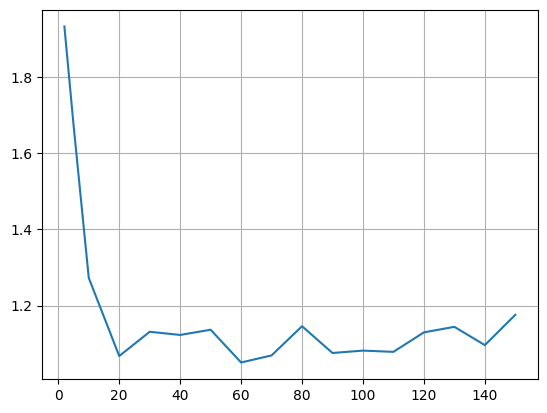

In [70]:
plt.plot(nodes, result)
plt.grid()
plt.show()

## 5.추가 실험2

* Hidden Layer 수 : 1,2,3,4,5,6,7,8,9,10
    * 각 레이어의 노드 수 : 10개
* 함수 생성
    * 입력 : 레이어 수
    * 출력(return) : validation 성능(MAE)
* for loop로 반복 실행




### (1) 모델링 함수 생성

In [71]:
nefatures = x_train.shape[1]

def modeling_test2(layer) :

    # 레이어 리스트 만들기
    # 레이어 수 만큼 리스트에 레이어 추가

    clear_session()

    # 첫번째 레이어는 input_shape가 필요.
    layer_list = [Dense(10 ,input_shape = (nfeatures,)  , activation = 'relu' )]

    # 주어진 레이어 수에 맞게 레이어 추가
    for i in range(2, layer) :  # 첫번째 레이어, 아웃풋 레이어는 명시적으로 추가하므로 2부터 시작
        layer_list.append(Dense(10 , activation = 'relu' ))

    # Output Layer 추가하고 모델 선언
    layer_list.append(Dense(1))
    model = Sequential(layer_list)

    # 레이어 잘 추가된 건지 확인하기 위해 summary 출력
    print(model.summary())

    model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')
    model.fit(x_train, y_train, epochs = 50, verbose = False)

    pred = model.predict(x_val)
    mae = mean_absolute_error(y_val, pred)

    return mae


### (2) 반복실행

In [72]:
layers = list(range(1,11))
result = []
for l in layers :
    result.append(modeling_test2(l))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                190       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
3/3 [==============================] - 0s 3ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                190       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
        

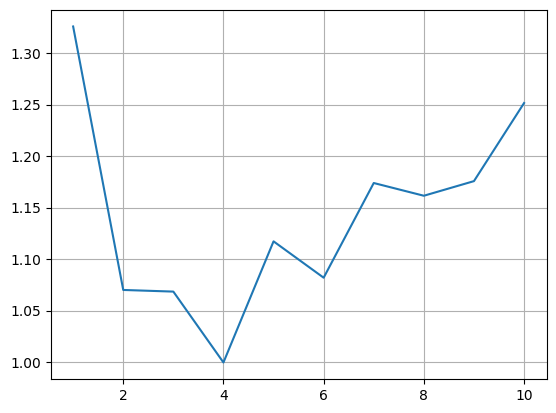

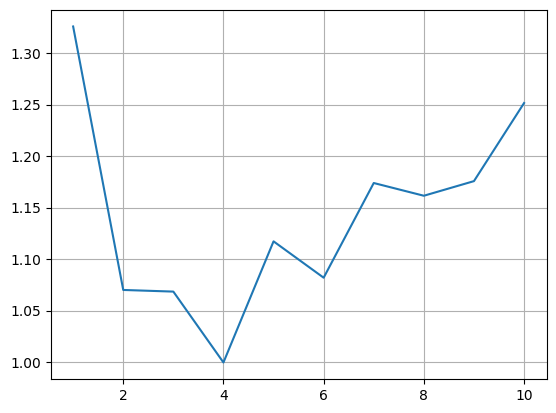

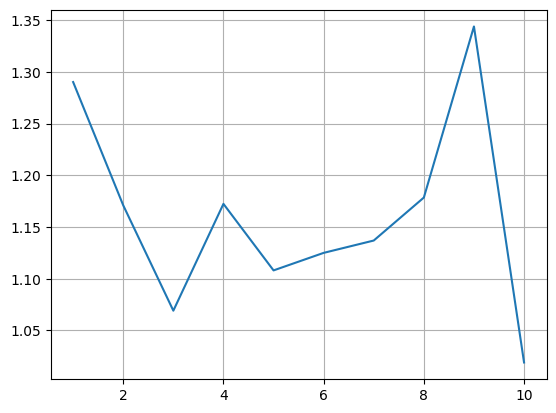

In [73]:
plt.plot(layers, result)
plt.grid()
plt.show()